# چالش: تحلیل متن درباره علم داده

> *در این نوت‌بوک، ما با استفاده از مقاله ویکی‌پدیا درباره یادگیری ماشین آزمایش می‌کنیم. می‌توانید ببینید که برخلاف علم داده، این مقاله شامل اصطلاحات زیادی است که تحلیل را پیچیده‌تر می‌کند. ما باید راه دیگری برای پاکسازی داده‌ها پس از استخراج کلمات کلیدی پیدا کنیم تا از شر برخی ترکیب‌های پرتکرار اما بی‌معنی خلاص شویم.*

در این مثال، بیایید یک تمرین ساده انجام دهیم که تمام مراحل یک فرآیند سنتی علم داده را پوشش می‌دهد. نیازی نیست کدی بنویسید، فقط می‌توانید روی سلول‌های زیر کلیک کنید تا آن‌ها را اجرا کرده و نتیجه را مشاهده کنید. به عنوان یک چالش، تشویق می‌شوید که این کد را با داده‌های مختلف امتحان کنید.

## هدف

در این درس، ما درباره مفاهیم مختلف مرتبط با علم داده صحبت کرده‌ایم. بیایید سعی کنیم با انجام **استخراج متن** مفاهیم بیشتری را کشف کنیم. ما با متنی درباره علم داده شروع می‌کنیم، کلمات کلیدی را از آن استخراج می‌کنیم و سپس سعی می‌کنیم نتیجه را تجسم کنیم.

به عنوان متن، از صفحه علم داده در ویکی‌پدیا استفاده خواهیم کرد:


In [2]:
url = 'https://en.wikipedia.org/wiki/Data_science'
url = 'https://en.wikipedia.org/wiki/Machine_learning'

## مرحله ۱: دریافت داده‌ها

اولین مرحله در هر فرآیند علم داده، دریافت داده‌ها است. ما از کتابخانه `requests` برای این کار استفاده خواهیم کرد:


In [3]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Machine learning - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"77162785-16e9-4d7f-a175-7f3fcf502a66","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Machine_learning","wgTitle":"Machine learning","wgCurRevisionId":1041247229,"wgRevisionId":1041247229,"wgArticleId":233488,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 errors: missing periodical","Harv and Sfn no-target errors","CS1 maint: uses authors parameter","Articles with short description","Short description is dif

## مرحله ۲: تبدیل داده‌ها

گام بعدی تبدیل داده‌ها به شکلی است که برای پردازش مناسب باشد. در مورد ما، کد منبع HTML را از صفحه دانلود کرده‌ایم و باید آن را به متن ساده تبدیل کنیم.

روش‌های زیادی برای انجام این کار وجود دارد. ما از ساده‌ترین شیء داخلی [HTMLParser](https://docs.python.org/3/library/html.parser.html) در پایتون استفاده خواهیم کرد. لازم است کلاس `HTMLParser` را زیرکلاس کنیم و کدی را تعریف کنیم که تمام متن داخل تگ‌های HTML را جمع‌آوری کند، به جز تگ‌های `<script>` و `<style>`.


In [4]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Machine learning - Wikipedia Machine learning From Wikipedia, the free encyclopedia Jump to navigation Jump to search Study of algorithms that improve automatically through experience For the journal, see  Machine Learning (journal) . "Statistical learning" redirects here. For statistical learning in linguistics, see  statistical learning in language acquisition . Part of a series on Artificial intelligence Major goals Artificial general intelligence Planning Computer vision General game playing Knowledge reasoning Machine learning Natural language processing Robotics Approaches Symbolic Deep learning Bayesian networks Evolutionary algorithms Philosophy Ethics Existential risk Turing test Chinese room Control problem Friendly AI History Timeline Progress AI winter Technology Applications Projects Programming languages Glossary Glossary v t e Part of a series on Machine learning and  data mining Problems Classification Clustering Regression Anomaly detection Data Cleaning AutoML Associ

## مرحله ۳: دریافت بینش‌ها

مهم‌ترین مرحله این است که داده‌های خود را به شکلی تبدیل کنیم که بتوانیم از آن‌ها بینش کسب کنیم. در مورد ما، می‌خواهیم کلمات کلیدی را از متن استخراج کنیم و ببینیم کدام کلمات کلیدی معنادارتر هستند.

ما از کتابخانه پایتون به نام [RAKE](https://github.com/aneesha/RAKE) برای استخراج کلمات کلیدی استفاده خواهیم کرد. ابتدا، بیایید این کتابخانه را نصب کنیم اگر قبلاً موجود نیست:


In [5]:
import sys
!{sys.executable} -m pip install nlp_rake

C:\winapp\Miniconda3\lib\site-packages\secretstorage\dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
C:\winapp\Miniconda3\lib\site-packages\secretstorage\util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


عملکرد اصلی از شیء `Rake` در دسترس است که می‌توانیم با استفاده از برخی پارامترها آن را سفارشی کنیم. در مورد ما، حداقل طول یک کلمه کلیدی را به ۵ کاراکتر، حداقل تکرار یک کلمه کلیدی در سند را به ۳، و حداکثر تعداد کلمات در یک کلمه کلیدی را به ۲ تنظیم خواهیم کرد. می‌توانید با مقادیر دیگر آزمایش کنید و نتیجه را مشاهده کنید.


In [6]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('data mining', 4.0),
 ('polynomial time', 4.0),
 ('dimensionality reduction', 4.0),
 ('anomaly detection', 4.0),
 ('data set', 4.0),
 ('bayesian networks', 4.0),
 ('language corpora', 4.0),
 ('mcgraw hill', 4.0),
 ('mit press', 4.0),
 ('retrieved 2018-08-20', 4.0),
 ('artificial neuron', 3.9642857142857144),
 ('statistical learning', 3.9470198675496686),
 ('feature learning', 3.9470198675496686),
 ('reinforcement learning', 3.9470198675496686),
 ('deep learning', 3.9470198675496686),
 ('main article', 3.9411764705882355),
 ('machine learning', 3.9144111718974948),
 ('pattern recognition', 3.9),
 ('neural networks', 3.875),
 ('artificial intelligence', 3.864285714285714),
 ('supervised learning', 3.835908756438558),
 ('speech recognition', 3.833333333333333),
 ('bayesian network', 3.833333333333333),
 ('explicitly programmed', 3.8),
 ('biological brain', 3.8),
 ('unsupervised learning', 3.780353200883002),
 ('outlier detection', 3.75),
 ('ieee transactions', 3.75),
 ('isbn 978-0-262-0

ما فهرستی از اصطلاحات به همراه درجه اهمیت مرتبط با آن‌ها به دست آوردیم. همان‌طور که می‌بینید، مرتبط‌ترین حوزه‌ها، مانند یادگیری ماشین و کلان‌داده، در بالاترین موقعیت‌های فهرست قرار دارند.

## مرحله ۴: بصری‌سازی نتیجه

افراد معمولاً داده‌ها را در قالب بصری بهتر تفسیر می‌کنند. بنابراین، اغلب منطقی است که داده‌ها را بصری‌سازی کنیم تا به برخی بینش‌ها دست یابیم. می‌توانیم از کتابخانه `matplotlib` در پایتون برای رسم توزیع ساده کلمات کلیدی با میزان ارتباط آن‌ها استفاده کنیم:


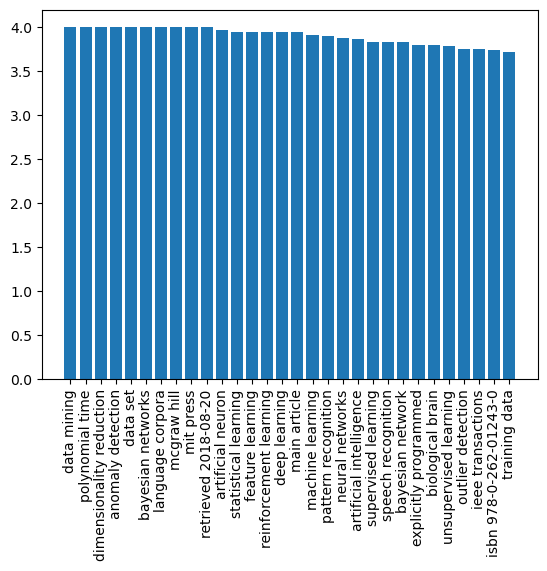

In [9]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res[:30])

با این حال، یک روش حتی بهتر برای تجسم فراوانی کلمات وجود دارد - استفاده از **ابر کلمات**. ما نیاز خواهیم داشت یک کتابخانه دیگر نصب کنیم تا ابر کلمات را از لیست کلمات کلیدی خود ترسیم کنیم.


In [71]:
!{sys.executable} -m pip install wordcloud

شیء `WordCloud` مسئول دریافت متن اصلی یا لیست از پیش محاسبه‌شده کلمات با فراوانی‌هایشان است و تصویری را بازمی‌گرداند که سپس می‌توان آن را با استفاده از `matplotlib` نمایش داد:


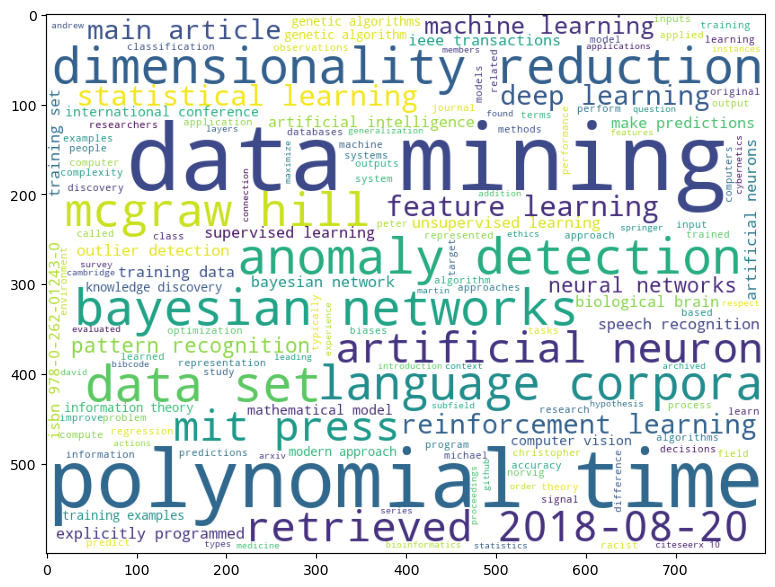

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))
plt.show()

ما همچنین می‌توانیم متن اصلی را به `WordCloud` بدهیم - بیایید ببینیم آیا می‌توانیم نتیجه مشابهی بگیریم:


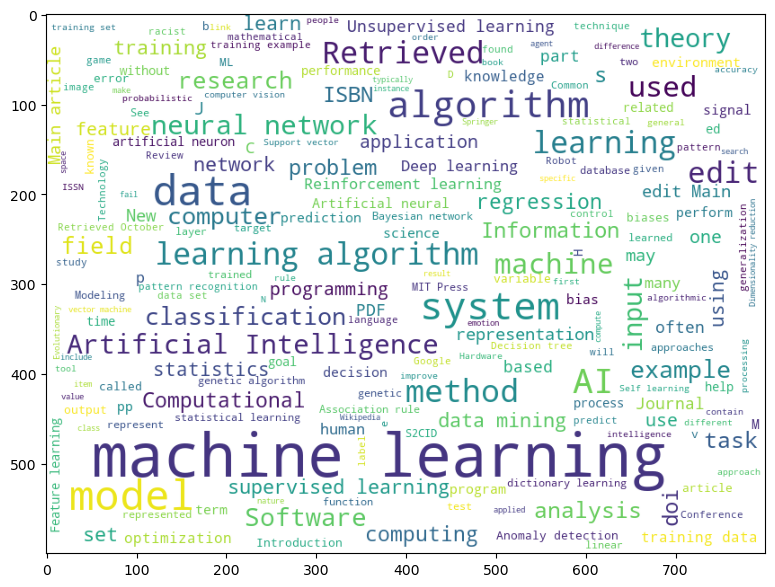

In [13]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))
plt.show()

In [61]:
wc.generate(text).to_file('images/ds_wordcloud.png')

می‌توانید ببینید که اکنون نمودار کلمات بسیار جذاب‌تر به نظر می‌رسد، اما همچنین شامل نویز زیادی است (مثلاً کلماتی نامرتبط مانند `Retrieved on`). همچنین، تعداد کمتری از کلمات کلیدی که از دو کلمه تشکیل شده‌اند، مانند *data scientist* یا *computer science* دریافت می‌کنیم. این به این دلیل است که الگوریتم RAKE در انتخاب کلمات کلیدی مناسب از متن عملکرد بهتری دارد. این مثال اهمیت پیش‌پردازش و پاکسازی داده‌ها را نشان می‌دهد، زیرا داشتن تصویری واضح در انتها به ما امکان می‌دهد تصمیمات بهتری بگیریم.

در این تمرین، ما یک فرآیند ساده برای استخراج معنا از متن ویکی‌پدیا را طی کردیم، به شکل کلمات کلیدی و نمودار کلمات. این مثال بسیار ساده است، اما به خوبی تمام مراحل معمولی را که یک دانشمند داده هنگام کار با داده‌ها طی می‌کند، نشان می‌دهد، از جمع‌آوری داده‌ها تا مصورسازی.

در دوره ما، تمام این مراحل را به‌طور مفصل بررسی خواهیم کرد.



---

**سلب مسئولیت**:  
این سند با استفاده از سرویس ترجمه هوش مصنوعی [Co-op Translator](https://github.com/Azure/co-op-translator) ترجمه شده است. در حالی که ما برای دقت تلاش می‌کنیم، لطفاً توجه داشته باشید که ترجمه‌های خودکار ممکن است شامل خطاها یا نادقتی‌ها باشند. سند اصلی به زبان اصلی آن باید به عنوان منبع معتبر در نظر گرفته شود. برای اطلاعات حساس، ترجمه حرفه‌ای انسانی توصیه می‌شود. ما هیچ مسئولیتی در قبال سوءتفاهم‌ها یا تفسیرهای نادرست ناشی از استفاده از این ترجمه نداریم.
